In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')
import librosa
from librosa import feature
from librosa import display
genres = [
    'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

In [2]:
# load dataframe from csv
dfFeatures = pd.read_csv("music_features.csv")



# extract genres for labels
genreList = dfFeatures['genre']

# drop genres and filenames for training data
dfFeatures= dfFeatures.drop(columns = ['filename', 'genre'])

dfFeatures.head()

,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,0.342053,1782.622682,2020.556328,3845.075667,0.080111,123.046875,-125.188171,120.222137,-18.358818,44.887314,...,-8.861547,9.301556,-4.159669,7.119120,-5.663028,0.530103,-2.870996,0.306077,-2.700369,2.370232
1,0.358000,1364.273766,1842.030467,2976.303348,0.055211,107.666016,-221.931198,131.147629,0.490468,39.101952,...,-3.123051,6.931743,-1.881995,4.951429,-4.531081,-0.463962,0.497853,0.039326,-1.083576,-0.112309
2,0.382027,1521.556846,1736.799388,3028.062974,0.070182,151.999081,-99.112022,141.554123,-25.738703,34.465645,...,-12.999936,4.544575,-8.695225,-2.315017,-8.144971,2.917833,-6.660074,-2.039234,-2.045270,-2.697336
3,0.391765,947.018874,1427.836298,1863.946038,0.030092,63.024009,-214.465668,156.586929,2.785257,26.750803,...,2.481811,4.701363,-2.364664,-0.866406,-3.422017,-0.273013,0.231585,2.437521,1.284240,-2.200283
4,0.316456,2046.427867,1858.463045,4005.025898,0.116385,135.999178,-151.967178,115.340431,-31.880495,23.762522,...,-16.674786,-4.082293,-4.755991,-7.974098,-9.649985,-2.115260,-8.198335,-1.059961,-3.900608,-12.995133


In [3]:
# standardize data  
scaler = StandardScaler()
X = scaler.fit_transform(np.array(dfFeatures.iloc[:, :-1], dtype = float))

# encode labels 
encoder = LabelEncoder()
y = encoder.fit_transform(genreList)

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [4]:
# initialize keras network
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
# configure model for training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# train model

# https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/
from keras import callbacks

#callback to prevent overfitting
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)


history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=128,
                    callbacks =[earlystopping])

Epoch 1/100
5/5 [==============================] - 1s 264ms/step - loss: 2.2646 - accuracy: 0.1502 - val_loss: 2.0531 - val_accuracy: 0.2750
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 1.9453 - accuracy: 0.3448 - val_loss: 1.8423 - val_accuracy: 0.4000
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 1.7602 - accuracy: 0.3913 - val_loss: 1.6927 - val_accuracy: 0.3950
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 1.5940 - accuracy: 0.4168 - val_loss: 1.5785 - val_accuracy: 0.4200
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 1.4619 - accuracy: 0.4653 - val_loss: 1.4813 - val_accuracy: 0.4550
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 1.3496 - accuracy: 0.5580 - val_loss: 1.4111 - val_accuracy: 0.5100
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 1.2627 - accuracy: 0.5876 - val_loss: 1.3470 - val_accuracy: 0.5300
Epoch 8/100
5/5 [==

In [7]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 1.0999 - accuracy: 0.5900


Text(0.5, 1.0, 'Dataset 1: Confusion Matrix: Base Model')

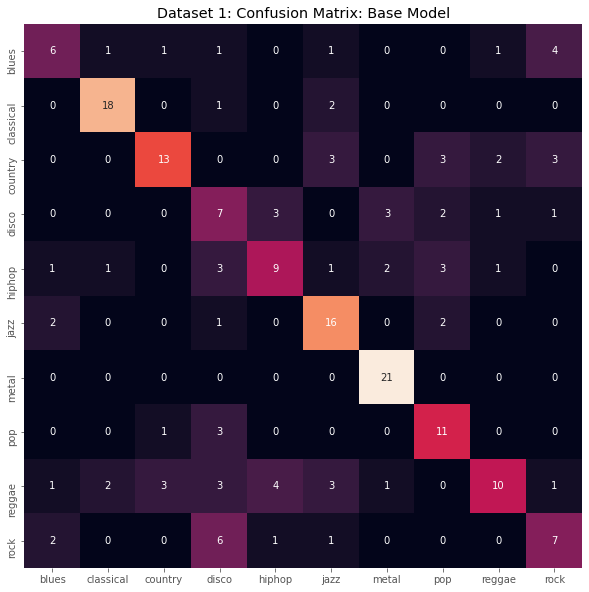

In [8]:
prediction = model.predict(X_test)
y_pred = []
for index, y_encode in enumerate(prediction):
    y_pred.append(np.argmax(y_encode))
corrMatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot = True, xticklabels=genres, yticklabels=genres, cbar=False).set_title("Dataset 1: Confusion Matrix: Base Model")

Text(0.5, 0, 'Epoch')

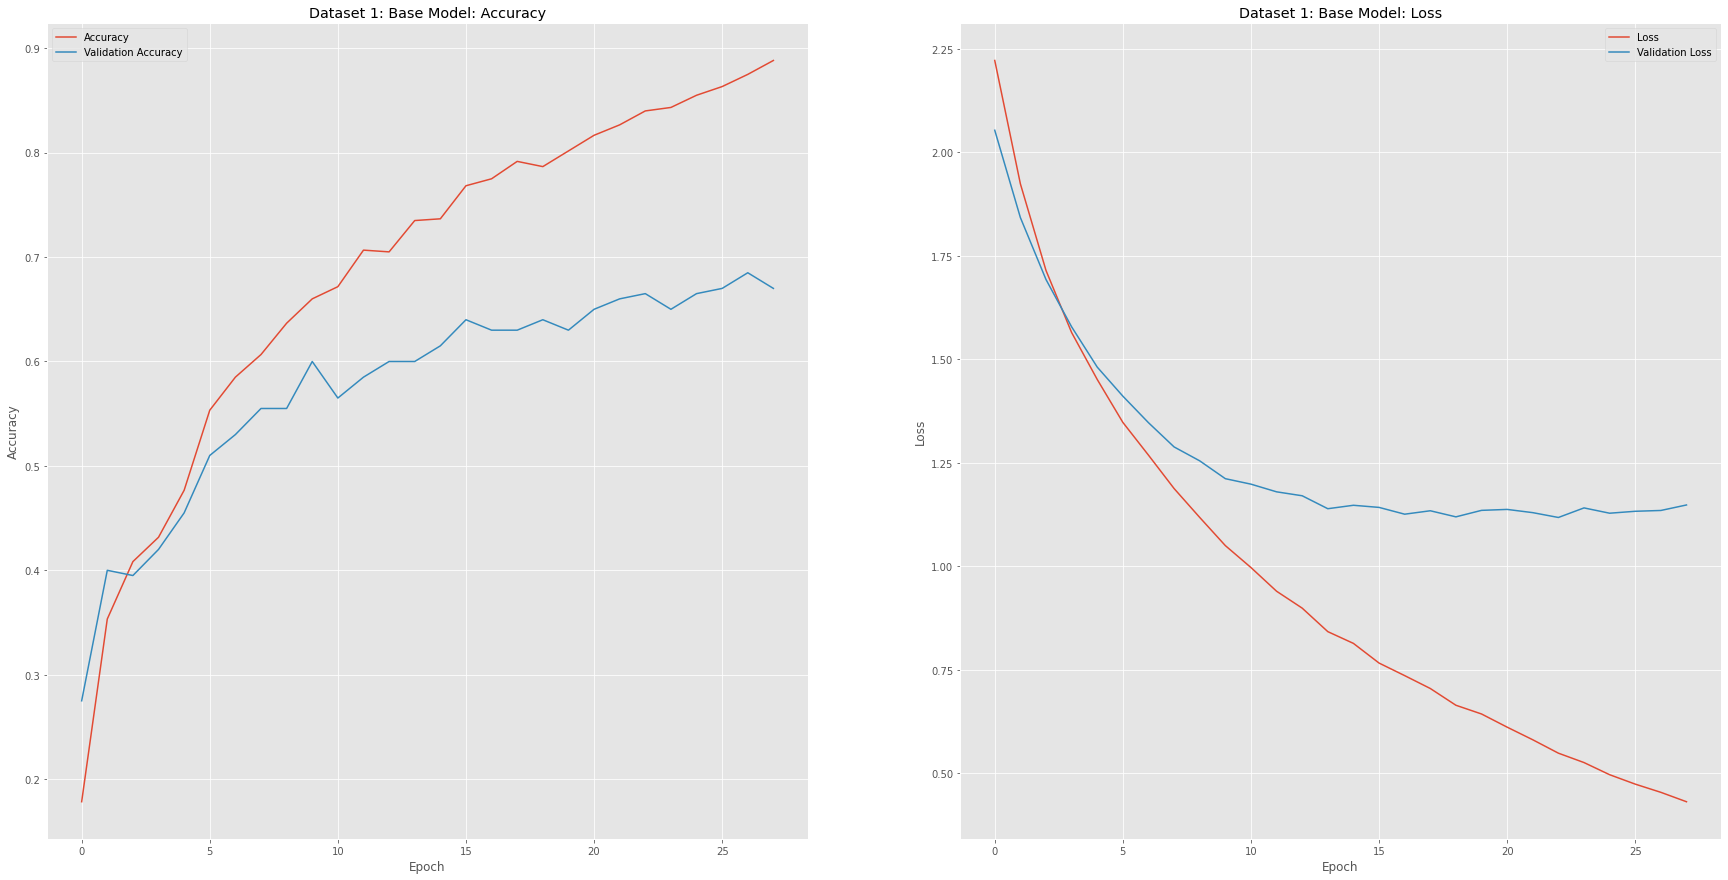

In [9]:
fig, ax = plt.subplots(1,2,figsize=(30,15))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[0].legend(["Accuracy", "Validation Accuracy"])
ax[1].legend(["Loss", "Validation Loss"])
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Dataset 1: Base Model: Accuracy")
ax[1].set_title("Dataset 1: Base Model: Loss")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")

In [10]:
# initialize keras network
modeldropout = keras.Sequential()
modeldropout.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(128, activation='relu'))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(64, activation='relu'))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
modeldropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = modeldropout.fit(X_train,
                    y_train,
                    epochs=100,
                    callbacks =[earlystopping],
                    validation_data=(X_val, y_val),
                    batch_size=128)

Epoch 1/100
5/5 [==============================] - 1s 45ms/step - loss: 2.2258 - accuracy: 0.1883 - val_loss: 2.0832 - val_accuracy: 0.2900
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 2.0698 - accuracy: 0.2868 - val_loss: 1.9425 - val_accuracy: 0.3950
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 1.9114 - accuracy: 0.3479 - val_loss: 1.8266 - val_accuracy: 0.3850
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 1.8381 - accuracy: 0.3727 - val_loss: 1.7099 - val_accuracy: 0.3900
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 1.6686 - accuracy: 0.4324 - val_loss: 1.6146 - val_accuracy: 0.4350
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 1.6404 - accuracy: 0.4229 - val_loss: 1.5254 - val_accuracy: 0.4500
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 1.5509 - accuracy: 0.4810 - val_loss: 1.4630 - val_accuracy: 0.4750
Epoch 8/100
5/5 [===

In [13]:
test_loss, test_acc  = modeldropout.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.5850


Text(0.5, 1.0, 'Dataset 1: Confusion Matrix: Model w/ Dropout')

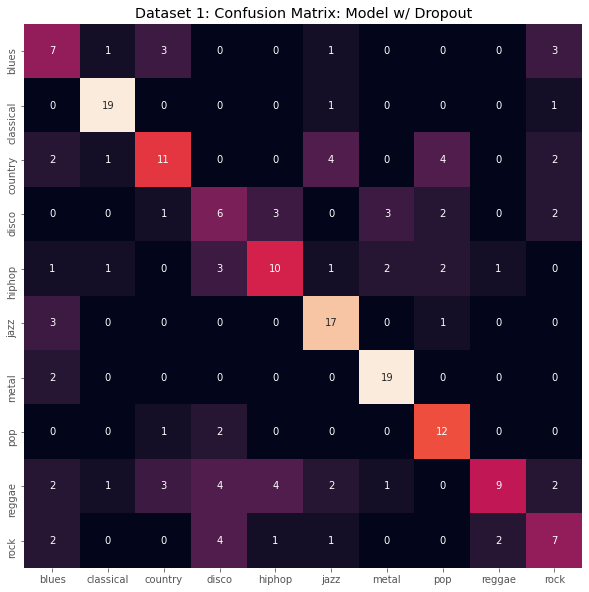

In [14]:
prediction = modeldropout.predict(X_test)
y_pred = []
for index, y_encode in enumerate(prediction):
    y_pred.append(np.argmax(y_encode))
corrMatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot = True, xticklabels=genres, yticklabels=genres, cbar=False).set_title("Dataset 1: Confusion Matrix: Model w/ Dropout")

Text(0.5, 0, 'Epoch')

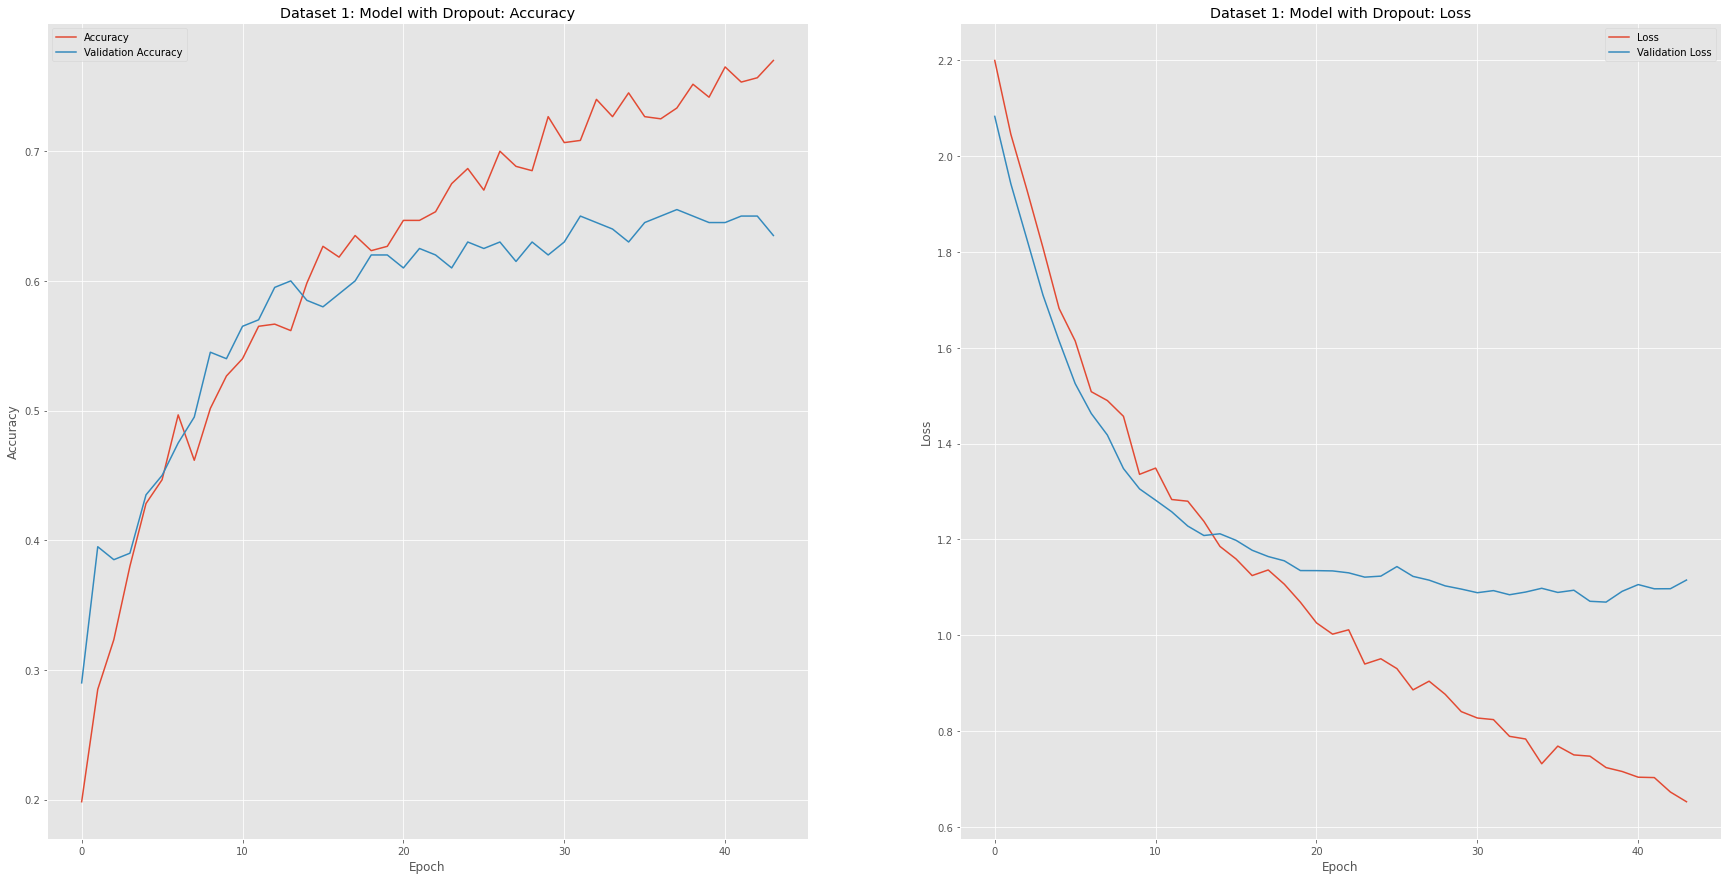

In [15]:
fig, ax = plt.subplots(1,2,figsize=(30,15))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[0].legend(["Accuracy", "Validation Accuracy"])
ax[1].legend(["Loss", "Validation Loss"])
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Dataset 1: Model with Dropout: Accuracy")
ax[1].set_title("Dataset 1: Model with Dropout: Loss")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")

In [16]:
modelReg = keras.Sequential()
modelReg.add(keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4), input_shape=(X_train.shape[1],)))
modelReg.add(keras.layers.Dropout(0.2))
modelReg.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
modelReg.add(keras.layers.Dropout(0.2))
modelReg.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
modelReg.add(keras.layers.Dropout(0.2))
modelReg.add(keras.layers.Dense(10, activation='softmax', activity_regularizer=tf.keras.regularizers.l2(1e-4)))

In [17]:
modelReg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = modelReg.fit(X_train,
                    y_train,
                    epochs=100,
                    callbacks =[earlystopping],
                    validation_data=(X_val, y_val),
                    batch_size=128)

Epoch 1/100
5/5 [==============================] - 1s 54ms/step - loss: 2.3235 - accuracy: 0.1339 - val_loss: 2.1216 - val_accuracy: 0.3300
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 2.1138 - accuracy: 0.2820 - val_loss: 1.9401 - val_accuracy: 0.3450
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 1.9706 - accuracy: 0.3152 - val_loss: 1.8029 - val_accuracy: 0.3450
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 1.8259 - accuracy: 0.3714 - val_loss: 1.7055 - val_accuracy: 0.3600
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 1.7502 - accuracy: 0.3989 - val_loss: 1.6258 - val_accuracy: 0.3950
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 1.6162 - accuracy: 0.4182 - val_loss: 1.5602 - val_accuracy: 0.4100
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 1.5700 - accuracy: 0.4395 - val_loss: 1.4976 - val_accuracy: 0.4400
Epoch 8/100
5/5 [===

In [19]:
test_loss, test_acc  = modelReg.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 1.1969 - accuracy: 0.6050


Text(0.5, 1.0, 'Dataset 1: Confusion Matrix: Model w/ Dropout and Reg')

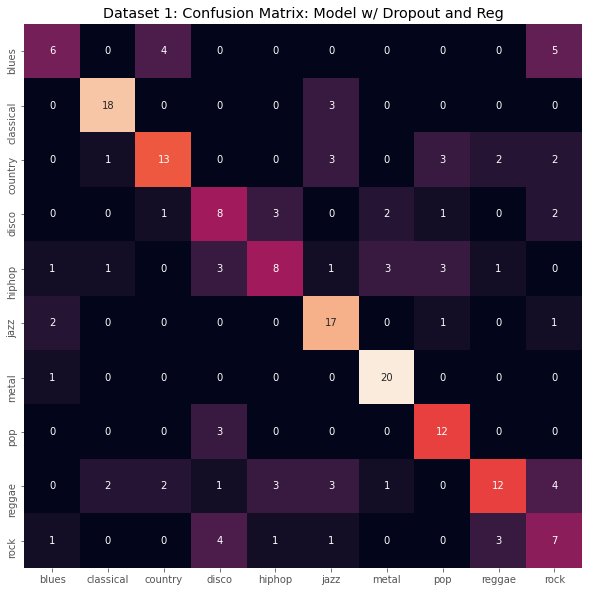

In [20]:
prediction = modelReg.predict(X_test)
y_pred = []
for index, y_encode in enumerate(prediction):
    y_pred.append(np.argmax(y_encode))
corrMatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot = True, xticklabels=genres, yticklabels=genres, cbar=False).set_title("Dataset 1: Confusion Matrix: Model w/ Dropout and Reg")

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(30,15))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[0].legend(["Accuracy", "Validation Accuracy"])
ax[1].legend(["Loss", "Validation Loss"])
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Dataset 1: Model with Dropout and Reg: Accuracy")
ax[1].set_title("Dataset 1: Model with Dropout and Reg: Loss")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")

Text(0.5, 0, 'Epoch')